In [1]:
import sqlite3 
import pandas as pd
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

In [2]:
# discount for products grouped by 1 of 8 categories
# c.execute("""SELECT productname, categoryId, discount
#              FROM orderdetail
#              JOIN product
#              ON orderdetail.productId = product.Id
#              WHERE categoryId = 1
#              ORDER BY productname ASC
#              ;""")

# price multiplied by quanity for each order, with average discount
# c.execute("""SELECT orderid, SUM(unitprice * quantity) AS total, AVG(discount) AS Avg_Disc
#              FROM orderdetail
#              GROUP BY orderid
#              ;""")

# This created 336,000 rows and discounts were all 0%
# c.execute("""SELECT *
#              FROM 'order'
#              JOIN orderdetail
#              WHERE employeeId = 4
#              ;""")

# Average discount per employee, all within 5-6% range
# c.execute("""SELECT orderid, unitPrice,quantity, AVG(discount),employeeid
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              ;""")

# goods sold for 1 employee for by orderid
# c.execute("""SELECT orderid, SUM(unitPrice * quantity) AS Goods_sold, employeeId
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              GROUP BY orderid
#              ;""")

# total sales (count and cost) for each 9 employees
# c.execute("""SELECT count(orderid) AS count,SUM(unitPrice * quantity) AS Goods_sold,employeeId
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              ;""")

# names, id, country and title of 9 employees
# c.execute("""SELECT lastname, id,country, title
#              FROM employee
#              ;""")

#orders sales by date
# c.execute("""SELECT orderid, SUM(unitPrice*quantity) AS sale, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              GROUP BY orderid
#              ;""")

# sum of order sales by month
# c.execute("""SELECT SUM(unitPrice*quantity) AS sale, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE orderdate between '2014-04-01' and '2014-04-31'
#              ;""")

# I was looking to see if all employees contributed to sales, but could look at hire date instead
# Result: employee #7 made 2 sales in August, 2012 but none in July, 2012 - was that the hire date?
# c.execute("""SELECT employeeid, orderid, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE orderdate between '2012-08-01' and '2012-08-31'
#              ORDER BY employeeid 
#              ;""")

# HireDate returned values in 2024, 2025 and 2026. Back to checking if all 9 employees worked
# at Northwind from the July, 2012 until April, 2014 by using the method above
# c.execute("""SELECT lastname, hiredate
#              FROM employee
#              ;""")

# c.execute("""SELECT *
#              FROM product
#              ;""")

# product #1, quantity and 0 discount
# c.execute("""SELECT orderid,productid,quantity,discount
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE productId = 1 AND DISCOUNT = 0.0
#              ;""")

# df = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]
# df


# Question 1a. Does discount amount have a statistically significant effect on the quantity of a product in a order?

### Discount Per Category, mean quantity sold
|Category | discount |mean quantity sold|count|
|---------|----------|------------------|-----|
|1        |N         |20.8              |246  |
|1        |Y         |27.9              |158  |
|2        |N         |21.3              |131  |
|2        |Y         |29.5              |85   |
|3        |N         |23.1              |200  |
|3        |Y         |24.5              |134  |
|4        |N         |22.2              |224  |
|4        |Y         |29.5              |142  |
|5        |N         |22.7              |133  |
|5        |Y         |24.4              |63   |
|6        |N         |20.7              |97   |
|6        |Y         |28.8              |76   |
|7        |N         |21.0              |91   |
|7        |Y         |24.1              |45   |
|8        |N         |21.4              |195  |
|8        |Y         |26.0              |135  |

In [3]:
#Mean products grouped sold category (1-8) with 0.0 discount and > 0.0 discount 
# c.execute("""SELECT orderid,COUNT(productid),AVG(quantity) AS avg
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE categoryid = 8 AND DISCOUNT = 0.0
#              ;""")

# Assigned the value to a variable
# c.execute("""SELECT AVG(quantity) 
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE categoryid = 8 AND DISCOUNT = 0.0
#              ;""")
# df = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]
# avg = df.values
# print(avg)

In [4]:
# products in orders, no discount, count of 1317, all categories,

c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE DISCOUNT = 0.0
             ;""")
df_no_disc = pd.DataFrame(c.fetchall())
#df.columns = [x[0] for x in c.description]
# df

# no_disc = df.values
no_disc = df_no_disc[0].tolist()

In [5]:
df_no_disc.describe()

,0
count,1317.000000
mean,21.715262
std,17.507493
min,1.000000
25%,10.000000
50%,18.000000
75%,30.000000
max,130.000000


In [6]:
df_no_disc.head()

,0
0,12
1,10
2,5
3,9
4,40


In [7]:
no_discount_var = df_no_disc.var()
print("The variance of the product population with NO discount is: ", no_discount_var)

The variance of the product population with NO discount is:  0    306.512328
dtype: float64


In [8]:
# products in orders, with discount, count of 837, all categories

c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE DISCOUNT > 0.0
             ;""")
df_disc = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]
#df

# disc = df.values
disc = df_disc[0].tolist()

In [9]:
df_disc.describe()

,0
count,838.000000
mean,27.109785
std,20.771439
min,1.000000
25%,12.000000
50%,20.000000
75%,36.000000
max,130.000000


In [10]:
discount_var = df_disc.var()
print("The variance of the product population with a discount is: ", discount_var)

The variance of the product population with a discount is:  0    431.452688
dtype: float64


In [11]:
# code from 2 sample t-test lab
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/Annika/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


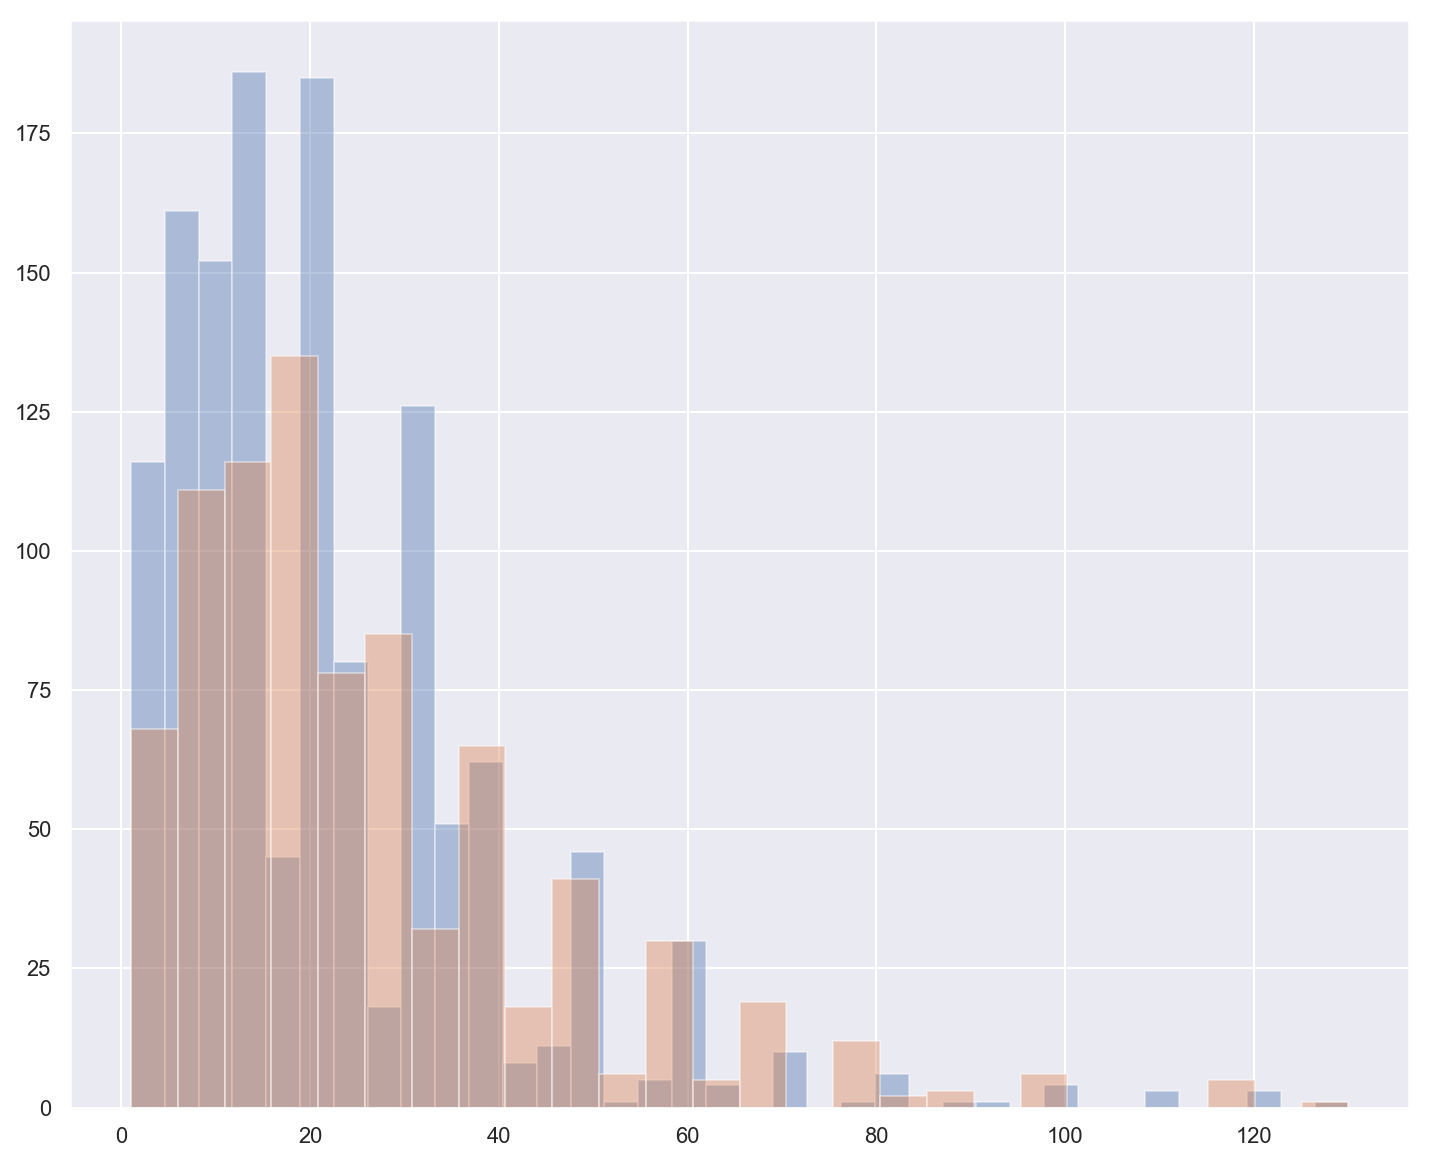

In [12]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(no_disc,kde=False)
sns.distplot(disc,kde=False)

In [13]:
# pd.DataFrame(no_disc).hist(bins='auto',figsize=(9,9),color='red')
# pd.DataFrame(disc).hist(bins='auto',figsize=(9,9),color='blue')
# df_no_disc.hist(bins=30,figsize  = [10,10],color='green')
# plt.title("no discount");

In [14]:
# df_disc.hist(bins=30,figsize  = [10,10],color='blue')
# plt.title("discount");

In [15]:
#print(disc.mean() - no_disc.mean()) #5.3945

In [16]:
# Null Hypothesis: There is no relationship between A and B, there is no difference between
# the two population means.
# Alternative Hypothesis: There is a some relationship between A and B, there is a difference in the 
# average order size based on a discount (between 1-20%).
# The p-value is less than the signficance level of 0.05, so we reject the null hypothesis that there is no 
# difference between the 2 population.
#
# This is Student's test
# t statistic and pvalue: used code from "2 sample ttest" lab in section 20
stats.ttest_ind(disc, no_disc,equal_var=False)
# when variances are equal, the pvalue is 1.4e-10
# when variances are not equal, the pvalue is 5.5e-10

Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)

In [17]:
# The variances are not equal, so will use Welch's test too.

# Welch's t-test

def welch_t(a, b):

    x1 = a.mean()
    x2 = b.mean()
    num = x1 - x2
    
    s_welch = np.sqrt((a.var(ddof=1)/len(a)) + (b.var(ddof=1)/len(b)))
    t = num/s_welch
    
    
    return abs(t)

t = welch_t(df_disc,df_no_disc)
print("Welch's t statistic: ",t)

Welch's t statistic:  0    6.239069
dtype: float64


In [18]:
# Welch's degrees of freedom
def welch_df(a, b):

    s1 = a.var()
    s2 = b.var()
    n1 = len(a)
    n2 = len(b)
    v1 = n1-1
    v2 = n2-1
    
    num = (s1/n1 + s2/n2)**2
    denom = (s1/n1)**2/v1 + (s2/n2)**2/v2
    
    welch_df = num/denom
    
    return welch_df

df = welch_df(df_disc, df_disc)
print("Welch's degrees of freedom: ", df)

Welch's degrees of freedom:  0    1674.0
dtype: float64


In [19]:
# Calculate p-value from Welch's test
import scipy.stats as stats


p = 1 - stats.t.cdf(t, df)

print("The p-value from Welch's test is: ", p)

The p-value from Welch's test is:  [2.78175705e-10]


In [20]:
# Difference between the p-values from Student's and Welch's
print("The p-value from Student's t-test is 5.6564e-10")
print("The p-value from Welch's t-test is   2.7817e-10")

The p-value from Student's t-test is 5.6564e-10
The p-value from Welch's t-test is   2.7817e-10


### CLT to get sample

In [21]:
def get_sample(data, n):
    sample = []
    
    for i in range(0,n):
        x = np.random.choice(data)
        sample.append(x)
    return sample

In [22]:
def get_sample_mean(sample):
    return sum(sample) / len(sample)

In [23]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample = []
    
    for i in range(0,dist_size):
    #while len(sample) != dist_size:
        s = get_sample(data,n)
        s_mean = get_sample_mean(s)
        sample.append(s_mean)
    return sample
        
disc_sample_dist = create_sample_distribution(disc)
no_disc_sample_dist = create_sample_distribution(no_disc)

In [24]:
df_disc_sample_dist = pd.DataFrame({'0':disc_sample_dist})
df_no_disc_sample_dist = pd.DataFrame({'0':no_disc_sample_dist})
df_no_disc_sample_dist.head()

,0
0,25.100000
1,24.700000
2,20.633333
3,25.300000
4,20.166667


In [25]:
#Rerun Welch's with sample means from 2 populations:
t_sample = welch_t(df_disc_sample_dist,df_no_disc_sample_dist)
df_sample = welch_df(df_disc_sample_dist,df_no_disc_sample_dist)
p_sample = 1 - stats.t.cdf(t_sample, df_sample)
print("Welch's with a sample distribution: ", t_sample,df_sample,p_sample)

Welch's with a sample distribution:  0    10.387443
dtype: float64 0    191.441301
dtype: float64 [0.]


In [26]:
#Rerun Student's t-test with sample means
stats.ttest_ind(df_disc_sample_dist, df_no_disc_sample_dist,equal_var=False)

Ttest_indResult(statistic=array([10.38744327]), pvalue=array([2.48787171e-20]))

In [27]:
# from numpy import std, mean,sqrt, variance

# def Cohen_d(group1, group2):
#     dif = mean(group1) - mean(group2)
#     n1, n2 = len(group1), len(group2)
#     var1 = var(group1)
#     var2 = var(group2)

#     pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
#     d = diff / np.sqrt(pooled_var)
    
#     return d

In [28]:
from numpy import std,mean,sqrt

def Cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny -2
    pooled_var = ((nx-1)*std(x,ddof=1) **2 + (ny-1)*std(y,ddof=1) ** 2) / dof
    return (mean(x) - mean(y)) / sqrt(pooled_var)

In [29]:
# EFFECT SIZE: Effect size measures the magnitude of the difference between the groups being tested. Cohen's d is 
# typically the the metric used.

effect = Cohen_d(disc_sample_dist,no_disc_sample_dist)
print("The measure of the effect: ",round(effect,4))

The measure of the effect:  1.469


In [30]:
# POWER: Power measures an experiment's ability to detect a difference when one exists or the probability of 
# rejecting the null given that it is indeed false.

#statistical power lecture, section 21

from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()

p = power_analysis.solve_power(effect_size=effect, alpha=0.05, nobs1=30)
print('power: ', round(p))

power:  1.0


### ANOVA Evaluation

In [31]:
c.execute("""SELECT quantity, discount
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             ;""")
anova = pd.DataFrame(c.fetchall())
anova.columns = [x[0] for x in c.description]
anova.head(10)

,Quantity,Discount
0,12,0.00
1,10,0.00
2,5,0.00
3,9,0.00
4,40,0.00
5,10,0.00
6,35,0.15
7,15,0.15
8,6,0.05
9,15,0.05


In [32]:
anova.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [33]:
#anova['zero'].apply(lambda x: "1" if x == '0.00' else 0 for x in anova['Discount']]
# anova['onefive'] = ["1" if x  else 0 for x in anova['Discount']]

#this created categorial variables, but too many
# cat_disc = anova['Discount'].astype('category')
# cat_disc.head(10)

# anova['Zero'] = 0
# anova.head(10)   
# anova.info()
# for row in anova:
#     if anova['Discount'] == '0.00':
#         anova['Zero'] = 1
#     else:
#         anova['Zero'] = 0

In [34]:
def transform_zero(df):
    if df['Discount'] == 0.00:
        return 1
    else:
        return 0
    
anova['Zero'] = anova.apply(transform_zero, axis=1)
anova.head(10)

,Quantity,Discount,Zero
0,12,0.00,1
1,10,0.00,1
2,5,0.00,1
3,9,0.00,1
4,40,0.00,1
5,10,0.00,1
6,35,0.15,0
7,15,0.15,0
8,6,0.05,0
9,15,0.05,0


In [35]:
def transform_five(df):
    if df['Discount'] > 0.00 and df['Discount'] <= 0.05:
        return 1
    else:
        return 0
    
def transform_ten(df):
    if df['Discount'] > 0.06 and df['Discount'] <= 0.10:
        return 1
    else:
        return 0  
    
def transform_fifteen(df):
    if df['Discount'] > 0.10 and df['Discount'] <= 0.15:
        return 1
    else:
        return 0    
    
def transform_twenty(df):
    if df['Discount'] > 0.15 and df['Discount'] <= 0.20:
        return 1
    else:
        return 0
    
def transform_twentyfive(df):
    if df['Discount'] > 0.20:
        return 1
    else:
        return 0    

In [36]:
anova['OneFive'] = anova.apply(transform_five, axis=1)
anova['SixTen'] = anova.apply(transform_ten, axis=1)
anova['Fifteen'] = anova.apply(transform_fifteen, axis=1)
anova['Twenty'] = anova.apply(transform_twenty, axis=1)
anova['Twentyfive'] = anova.apply(transform_twentyfive, axis=1)

In [37]:
anova.head(10)

,Quantity,Discount,Zero,OneFive,SixTen,Fifteen,Twenty,Twentyfive
0,12,0.00,1,0,0,0,0,0
1,10,0.00,1,0,0,0,0,0
2,5,0.00,1,0,0,0,0,0
3,9,0.00,1,0,0,0,0,0
4,40,0.00,1,0,0,0,0,0
5,10,0.00,1,0,0,0,0,0
6,35,0.15,0,0,0,1,0,0
7,15,0.15,0,0,0,1,0,0
8,6,0.05,0,1,0,0,0,0
9,15,0.05,0,1,0,0,0,0


In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
formula = 'Quantity ~ C(Zero) + C(OneFive) + C(SixTen) + C(Fifteen) + C(Twenty) + C(Twentyfive)'
lm = ols(formula, anova).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df         F    PR(>F)
C(Zero)           388.396644     1.0  1.093693  0.295772
C(OneFive)        624.355030     1.0  1.758133  0.184999
C(SixTen)         536.854694     1.0  1.511739  0.219009
C(Fifteen)        691.613481     1.0  1.947527  0.162998
C(Twenty)         622.377157     1.0  1.752564  0.185696
C(Twentyfive)     684.108965     1.0  1.926395  0.165297
Residual       762806.066713  2148.0       NaN       NaN


### P-values from ANOVA
The resulting p-values from the ANOVA test are greater than the significance level (typically alpha = 0.05), so we fail to reject the null hypothesis (which is that there is no difference between the quantity of goods sold with a discount and without a discount.)

In [40]:
anova.head()

,Quantity,Discount,Zero,OneFive,SixTen,Fifteen,Twenty,Twentyfive
0,12,0.0,1,0,0,0,0,0
1,10,0.0,1,0,0,0,0,0
2,5,0.0,1,0,0,0,0,0
3,9,0.0,1,0,0,0,0,0
4,40,0.0,1,0,0,0,0,0


In [41]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount = 0
             ;""")
quan_at_zero = pd.DataFrame(c.fetchall())
quan_at_zero.columns = [x[0] for x in c.description]
quan_at_zero.head(3)
quan_at_zero.describe()

,Quantity
count,1317.000000
mean,21.715262
std,17.507493
min,1.000000
25%,10.000000
50%,18.000000
75%,30.000000
max,130.000000


In [42]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount > 0.0 and discount <= 0.05
             ;""")
quan_at_onefive = pd.DataFrame(c.fetchall())
quan_at_onefive.columns = [x[0] for x in c.description]
quan_at_onefive.head()

,Quantity
0,6
1,15
2,40
3,25
4,12


In [43]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount > 0.05 and discount <= 0.1
             ;""")
quan_at_sixten = pd.DataFrame(c.fetchall())
quan_at_sixten.columns = [x[0] for x in c.description]


In [44]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount = 0.15
             ;""")
quan_at_fifteen = pd.DataFrame(c.fetchall())
quan_at_fifteen.columns = [x[0] for x in c.description]

In [45]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount = 0.20
             ;""")
quan_at_twenty = pd.DataFrame(c.fetchall())
quan_at_twenty.columns = [x[0] for x in c.description]


In [46]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE discount = 0.25
             ;""")
quan_at_twentyfive = pd.DataFrame(c.fetchall())
quan_at_twentyfive.columns = [x[0] for x in c.description]


In [47]:
#Compare 0 to onefive
t1 = welch_t(quan_at_zero,quan_at_onefive)
df1 = welch_df(quan_at_zero,quan_at_onefive)
p1 = 1 - stats.t.cdf(t1, df1)

#Compare 0 to sixten
t2 = welch_t(quan_at_zero,quan_at_sixten)
df2 = welch_df(quan_at_zero,quan_at_sixten)
p2 = 1 - stats.t.cdf(t2, df2)

#Compare 0 to fifteen
t3 = welch_t(quan_at_zero,quan_at_fifteen)
df3 = welch_df(quan_at_zero,quan_at_fifteen)
p3 = 1 - stats.t.cdf(t3, df3)

#Compare 0 to twenty
t4 = welch_t(quan_at_zero,quan_at_twenty)
df4 = welch_df(quan_at_zero,quan_at_twenty)
p4 = 1 - stats.t.cdf(t4, df4)

#Compare 0 to twentyfive
t5 = welch_t(quan_at_zero,quan_at_twentyfive)
df5 = welch_df(quan_at_zero,quan_at_twentyfive)
p5 = 1 - stats.t.cdf(t5, df5)

print(p1,p2,p3,p4,p5)

[0.00086072] [0.02237801] [8.61036472e-05] [0.0004055] [7.96152546e-05]


In [48]:
def welch_computations(a,b):
    t = welch_t(a,b)
    print(t)
    df = welch_df(a,b)
    print(df)
    p = 1 - stats.t.cdf(t, df)
    print(p)
    return (p)

welch_computations(quan_at_zero,quan_at_twentyfive)


Quantity    3.857268
dtype: float64
Quantity    181.125082
dtype: float64
[7.96152546e-05]


array([7.96152546e-05])

## Results
wiht Bonferroni correction

## Question 2
Is there a statistical difference in the average size (in dollars) per sale between the US and UK offices?  There are 9 employees: 5 in the US and 4 in the UK. 

In [49]:
# goods sold for 1 employee for by orderid
# c.execute("""SELECT orderid, SUM(unitPrice * quantity) AS Goods_sold, employeeId
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              GROUP BY orderid
#              ;""")

# names, id, country and title of 9 employees
# c.execute("""SELECT lastname, id,country, title
#              FROM employee
#              ;""")


#total sales (count and cost) for each 9 employees
c.execute("""SELECT count(orderid) AS count,SUM(unitPrice * quantity) AS Goods_sold,employeeId
             FROM orderdetail
             JOIN 'order' as o
             ON orderdetail.orderid = o.id
             WHERE employeeID=9
             ;""")

df_sales = pd.DataFrame(c.fetchall())
df_sales.columns = [x[0] for x in c.description]
df_sales

,count,Goods_sold,EmployeeId
0,107,82964.0,9


In [50]:
# us_sales 
y1 = [585,738,664,595,513]
#uk_sales 
y2= [646,465,803,785]
#us_employee 
x1 = ["1", "2", "3", "4","8"]
#uk_employee 
x2 = ["5","6","7","9"]

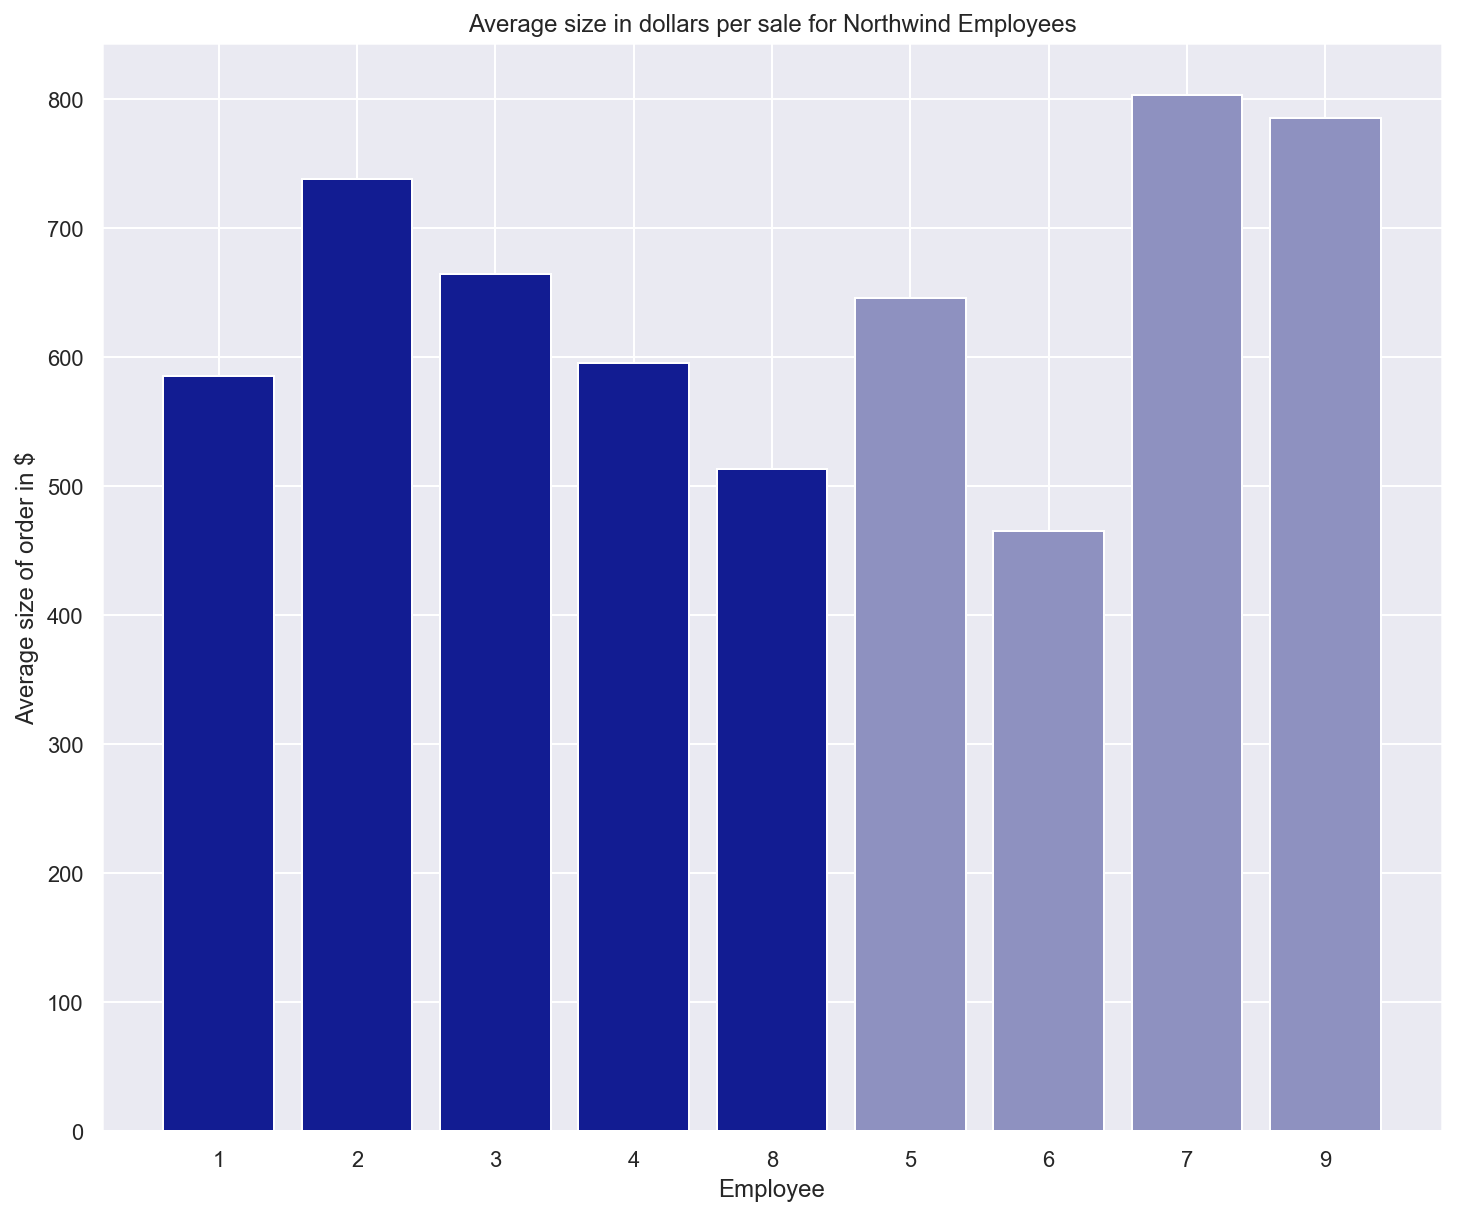

In [51]:
import matplotlib.pyplot as plt
plt.bar(x1, y1, color = '#121C92')
plt.bar(x2, y2, color = '#8e91c0')
plt.title("Average size in dollars per sale for Northwind Employees")
plt.xlabel("Employee")
plt.ylabel("Average size of order in $")
#plt.legend()
plt.show()

In [52]:
# Null Hypothesis: There is no difference between the two population means (average size of size in dollars)
# between the US office and the UK office.

# Alternative Hypothesis: There is a difference in the 
# average order size (in $) between the US office and UK office between the date July, 2012 and April, 2014.

# If the p-value is less than the signficance level of 0.05, we will reject the null hypothesis (that there is no 
# difference between the 2 populations.)
#
# This is Student's test
# t statistic and pvalue: used code from "2 sample ttest" lab in section 20

sales_stat = stats.ttest_ind(y1, y2,equal_var=True)
print(sales_stat)

Ttest_indResult(statistic=-0.6865290732878558, pvalue=0.5144703525010388)


# Question 3
Follow on to question 2.  Since there is a difference between the US and UK sales office in average revenue per order, does that have to be with the discounting differences between employees.  

In [53]:
c.execute("""SELECT count(orderid),SUM(unitPrice * quantity) AS Goods_sold,employeeId, avg(discount)
             FROM orderdetail
             JOIN 'order' as o
             ON orderdetail.orderid = o.id
             WHERE employeeID=9 and discount = 0
             ;""")


df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,count(orderid),Goods_sold,EmployeeId,avg(discount)
0,60,45890.91,9,0.0


# Question 3
Revenue per territory

In [54]:
#Look at the territory database
# 4 regions
# c.execute("""SELECT territorydescription, regionid
#              FROM 'territory'
#              ORDER BY regionid
#              ;""")

# Customer Data - 6 customer bases
# c.execute("""SELECT companyname, city, region, country
#              FROM 'customer'
#              ORDER BY region
#              ;""")

# customerid = BSBEV
# c.execute("""SELECT *
#              FROM 'order'
#              ORDER BY shipregion
#              ;""")


#id = AROUT, BSBEV
# 7 distinct customers in British Isles
c.execute("""SELECT sum(quantity * unitprice) / count(companyname) AS Avg
             FROM 'customer' AS c
             JOIN 'order' AS o
             ON c.id = o.customerid
             JOIN 'orderdetail' as od
             ON o.id = od.orderid
             WHERE region = "Southern Europe" 
             ;""")



df_terr = pd.DataFrame(c.fetchall())
df_terr.columns = [x[0] for x in c.description]
df_terr

,Avg
0,354.786058


In [55]:
# americas sales in dollars
y1 = [335500,150216]
# european sales in dollars
y2= [118000,539600, 120000,49000]
# american geographies
x1 = ['North America' ,'South America']
# european geographies
x2 = ['British Isles', 'Northern Europe', 'Scandinavia','Southern Europe']
# americas number of unique customers
z1 = [482,304]
# european number of unique customers
z2 = [190,752,213,137]
# american sales/customers
a1 = [696,494]
# european sales/customers
a2 = [621,718,563,355]

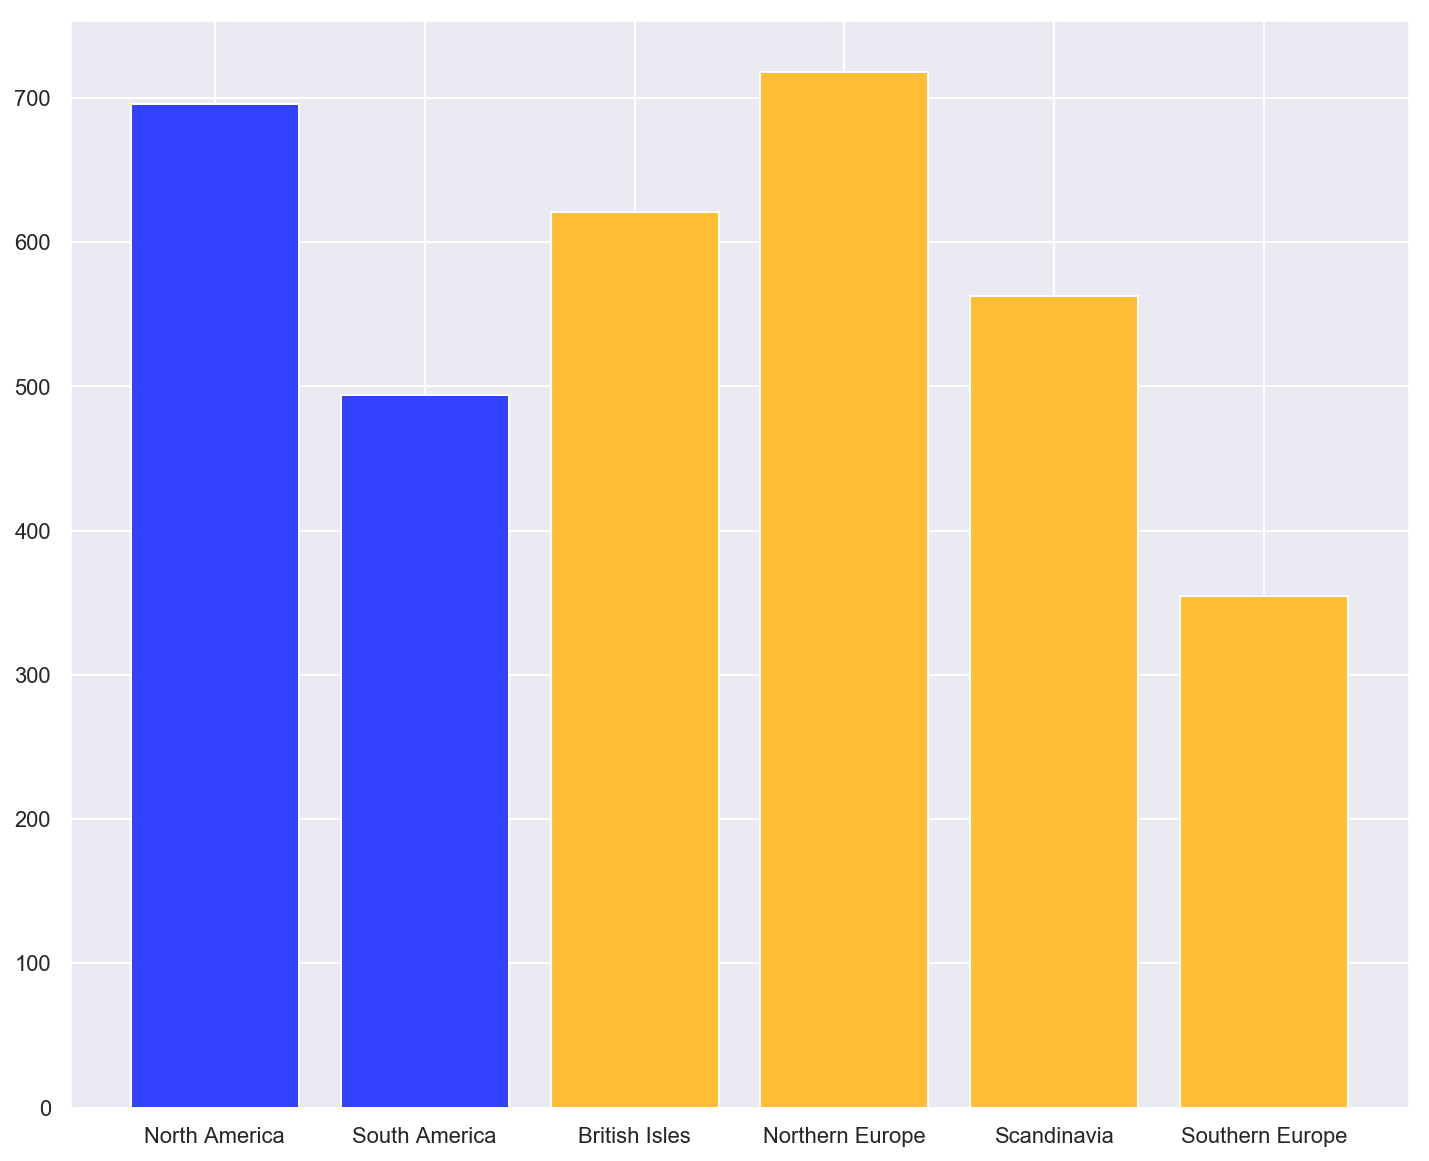

In [56]:
plt.bar(x1, a1, color = '#3342FF')
plt.bar(x2, a2, color = '#ffbe33')
plt.title("")
plt.xlabel("")
plt.ylabel("")
#plt.legend()
plt.show()

In [57]:
world = stats.ttest_ind(y1, y2,equal_var=True)
print(world)

Ttest_indResult(statistic=0.20386258550068423, pvalue=0.8484126087529578)


In [58]:
world2 = stats.ttest_ind(z1, z2,equal_var=True)
print(world2)

Ttest_indResult(statistic=0.31446702713133473, pvalue=0.7688858356084853)


In [59]:
world3 = stats.ttest_ind(a1, a2,equal_var=True)
print(world3)

Ttest_indResult(statistic=0.2353463624591777, pvalue=0.8254978201676861)


# Question 4

In [60]:
#price
c.execute("""SELECT productid, count(quantity), avg(discount)
             FROM 'orderdetail' 
             WHERE productid == "38" 
             ;""")
df_prices = pd.DataFrame(c.fetchall())
df_prices.columns = [x[0] for x in c.description]
df_prices

,ProductId,count(quantity),avg(discount)
0,38,24,0.045833


In [61]:
c.execute("""SELECT productid, count(quantity), avg(discount)
             FROM 'orderdetail' 
             WHERE productid == "33" 
             ;""")
df_prices = pd.DataFrame(c.fetchall())
df_prices.columns = [x[0] for x in c.description]
df_prices

,ProductId,count(quantity),avg(discount)
0,33,32,0.04375


In [62]:
# c.execute("""SELECT *
#              FROM 'supplier' 
#              ;""")
# df = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]
# df